# **Examen Parcial Pregunta 1 - Regresión Logistica**
***Univ. Villca Jaita Lino Fernando - Ing. Cs. de la Computación***

En este ejercicio se implementa regresion logistica a un dataset que contiene un conjunto de datos sobre las partidas de CS:GO es un juego de disparos táctico, donde dos equipos (CT y Terrorist) juegan al mejor de 30 rondas, cada ronda dura 1 minuto y 55 segundos. Hay 5 jugadores en cada equipo (10 en total) y el primer equipo en llegar a 16 rondas gana el juego. Al principio, un equipo juega como CT y el otro como Terrorista. Después de 15 rondas disputadas, los equipos cambian de bando. Hay 7 mapas diferentes en los que se puede jugar. Ganas una ronda como Terrorista colocando la bomba y asegurándote de que explote, o eliminando al otro equipo. Ganas una ronda como CT eliminando al otro equipo o desarmando la bomba, en caso de que hubiera sido colocada.  Predice quién gana instantáneas individuales de rondas


> **Datos de entrada** como:

> **Dato de salida  (y a predecir):** **Winner Ganador** (Terroristas = 1 ) y (Antiterroristas = 0)



> Nombre del Dataset: CS:GO Round Winner Classification
*   URL del Dataset: https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification
*   Temática (lo que se quiere buscar con el dataset): segun las variables quiero predecir si en una partida ganan los terroristas (T) o los antiterroristas (CT).

**Consideraciones:** El dataset contiene un archivo csv. utilizaremos entonces un porcentaje para entrenar el modelo y otro para realizar las pruebas como se plantea en el problema (80% y 20%). tiene un total de 122410 ejemplos: 97,928 (80%) para entrenamiento y 24,482 (20%) para test.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Cargamos los datos desde nuestro Google Drive

In [4]:
#Importamos la libreria pandas para poder manipular nuestros datos que son literales y poder cambiarlos a numericos
import pandas as pd

# Cargar el dataset
dataset = pd.read_csv('/content/drive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL 2024/1er Parcial/D1 CS GO Regresion de Clasificacion/CS GO Round Winner Classification/csgo_round_snapshots.csv', delimiter=',')


In [12]:
dataset.dtypes

time_left                    float64
ct_score                     float64
t_score                      float64
map                           object
bomb_planted                    bool
                              ...   
ct_grenade_molotovgrenade    float64
t_grenade_molotovgrenade     float64
ct_grenade_decoygrenade      float64
t_grenade_decoygrenade       float64
round_winner                  object
Length: 97, dtype: object

time_left	The time left in the current round.
ct_score	The current score of the Counter-Terrorist team.
t_score	The current score of the Terrorist team.
map	The map the round is being played on.	E.g. de_dust2, de_inferno and de_overpass
bomb_planted	If the bomb has been planted or not.	False = No, True = Yes
ct_health	The total health of all Counter-Terrorist players.	Player health in range 0-100.
t_health	The total health of all Terrorist players.	Player health in range 0-100.
ct_armor	The total armor of all Counter-Terrorist players.
t_armor	The total armor of all Terrorist players.
ct_money	The total bankroll of all Counter-Terrorist players.	Amount in USD.
t_money	The total bankroll of all Terrorist players.	Amount in USD.
ct_helmets	Number of helmets on the Counter-Terrorist team.
t_helmets	Number of helmets on the Terrorist team.
ct_defuse_kits	Number of defuse kits on the Counter-Terrorist team.
ct_players_alive	Number of alive players on the Counter-Terrorist team.	Range 0 to 5.
t_players_alive	Number of alive players on the Terrorist team.	Range 0 to 5.
ct_weapon_X	Weapon X count on Counter-Terrorist team.	E.g. Ak47, Deagle and UMP45.
t_weapon_X	Weapon X count on Terrorist team.	E.g. Ak47, Deagle and UMP45.
ct_grenade_X	Grenade X count on Counter-Terrorist team.	E.g. HeGrenade, Flashbang.
t_grenade_X	Grenade X count on Terrorist team.	E.g. HeGrenade, Flashbang.
round_winner	Winner.	CT = Counter-Terrorist, T = Terrorist

In [15]:
# Seleccionar las columnas especificadas que se considera en la web del dataset
data = dataset.loc[:, ["time_left", "ct_score", "t_score", "map", "bomb_planted",
                       "ct_health", "t_health", "ct_armor", "t_armor", "ct_money",
                       "t_money", "ct_helmets", "t_helmets", "ct_defuse_kits",
                       "ct_players_alive", "t_players_alive", "ct_weapon_ak47", "t_weapon_ak47",
                       "ct_grenade_hegrenade", "t_grenade_hegrenade", "round_winner"]]
print(data.shape)

(122410, 21)


In [16]:
# Convertir columnas categóricas a numéricas (astype('category').cat.codes, convierte las categorías en valores numéricos únicos.)
# Luego, cat.codes extrae estos códigos numéricos asignados a cada categoría.

data['map'] = data['map'].astype('category').cat.codes
data['bomb_planted'] = data['bomb_planted'].astype('category').cat.codes
data['round_winner'] = data['round_winner'].astype('category').cat.codes #(Terroristas T  = 1 ) y (Antiterroristas CT = 0)

# Verificar que las columnas categóricas se han convertido a numéricas
print(data.head())
print(data.dtypes)

   time_left  ct_score  t_score  map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0    1             0      500.0     500.0   
1     156.03       0.0      0.0    1             0      500.0     500.0   
2      96.03       0.0      0.0    1             0      391.0     400.0   
3      76.03       0.0      0.0    1             0      391.0     400.0   
4     174.97       1.0      0.0    1             0      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  ct_helmets  t_helmets  ct_defuse_kits  \
0       0.0      0.0    4000.0  ...         0.0        0.0             0.0   
1     400.0    300.0     600.0  ...         0.0        0.0             1.0   
2     294.0    200.0     750.0  ...         0.0        0.0             1.0   
3     294.0    200.0     750.0  ...         0.0        0.0             1.0   
4     192.0      0.0   18350.0  ...         0.0        0.0             1.0   

   ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  \
0        

In [ ]:
#Exportamos para verificar el estado del dataset en realcion a los archivos de tipo categoricos a numericos
#data.to_csv('/content/drive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL 2024/1er Parcial/datasetcsgo.csv', index=False)

In [17]:
print(data.shape)

(122410, 21)


Ahora nuestros ejemplos estan completos y contienes valores consistentes en cada una de sus columnas. Teniendo en total: 122410 ejemplos.
De los cuales utilizaremos: 97,928 (80%) para entrenamiento y 24,482 (20%) para test.

In [18]:
# Realizamos la asignacion de datos correspondiente a cada dataset
X_train, y_train = data.iloc[:97928, :20], data.iloc[:97928, 20]
X_test, y_test = data.iloc[97928:, :20], data.iloc[97928:, 20]
X = X_train.copy()
y = y_train.copy()
print(X.shape)
print(y.shape)

(97928, 20)
(97928,)


In [19]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [20]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


In [21]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [22]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

<a id="section2"></a>
####Función de Costo y Gradiente

In [28]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [29]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [30]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.00114363 -0.00315811 -0.00325454  0.00061192 -0.0019862   0.00904285
 -0.00903257  0.0048141  -0.0163095   0.01438095 -0.00615571  0.00467769
 -0.01492454  0.01459704 -0.01423743 -0.01030337  0.00731039 -0.00789931
  0.00905986 -0.00807774  0.00550891]


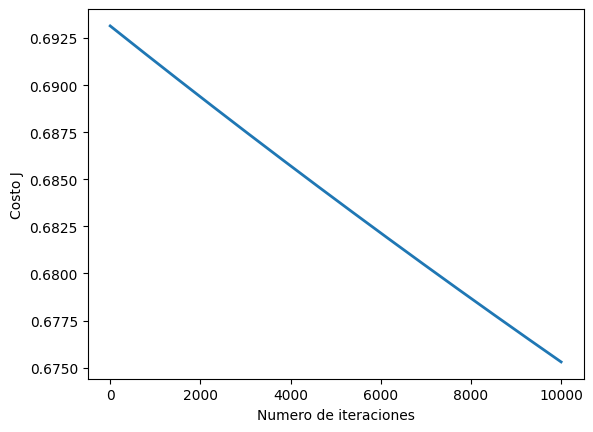

In [34]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.00001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(21)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [35]:
print(theta)

[ 0.00114363 -0.00315811 -0.00325454  0.00061192 -0.0019862   0.00904285
 -0.00903257  0.0048141  -0.0163095   0.01438095 -0.00615571  0.00467769
 -0.01492454  0.01459704 -0.01423743 -0.01030337  0.00731039 -0.00789931
  0.00905986 -0.00807774  0.00550891]


In [36]:
def predecir(theta, X):
    # Calcula las predicciones utilizando la función sigmoide
    predictions = sigmoid(X.dot(theta))
    return predictions

# Normalizar las características del conjunto de prueba
X_test_norm, _, _ = featureNormalize(X_test)

# Agregar una columna de unos para el término de sesgo
m_test, _ = X_test_norm.shape
X_test_norm_with_bias = np.column_stack((np.ones(m_test), X_test_norm))

# Realizar predicciones en los datos de prueba
predictions_test = predecir(theta, X_test_norm_with_bias)

# Ajustar las predicciones a 0 o 1 usando un umbral
threshold = 0.5
predicted_labels_test = (predictions_test > threshold).astype(int)

# Calcular la precisión del modelo en los datos de prueba
accuracy_test = np.mean(predicted_labels_test == y_test) * 100

print('Precisión del modelo en los datos de prueba: {:.2f}%'.format(accuracy_test))




Precisión del modelo en los datos de prueba: 71.86%


In [37]:
# Suponiendo que tienes tus nuevos datos de entrada en un DataFrame llamado 'nuevos_datos'

# 1. Preparar tus datos de entrada (asegúrate de que coincida con el formato que utilizaste durante el entrenamiento)
# Por ejemplo, si necesitas normalizar las características de tus nuevos datos, usa la misma media y desviación estándar que usaste durante el entrenamiento
X_test_norm = (X_test - mu) / sigma
#X_test_norm = featureNormalize(X_test)[0]

# Agregar una columna de unos para el término de sesgo
m_nuevos, _ = X_test_norm.shape
X_test_norm_with_bias = np.column_stack((np.ones(m_nuevos), X_test_norm))

# 2. Utilizar el modelo entrenado para hacer predicciones
predictions_nuevos = predecir(theta, X_test_norm_with_bias)

# 3. Opcional: Ajustar las predicciones a valores discretos si es necesario
# Por ejemplo, aplicar un umbral a las probabilidades de predicción
threshold = 0.5
predicted_labels_nuevos = (predictions_nuevos > threshold).astype(int)

# 4. Analizar las predicciones resultantes según sea necesario
# Por ejemplo, imprimir las primeras 10 predicciones
print(predicted_labels_nuevos[-20:])


[1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1]


In [38]:
#Podemos ver las y_reales del dataset con las y_predichas por el modelo
# Realiza las predicciones en el conjunto de prueba

#X_test_norm = (X_test - mu) / sigma
X_test_norm = featureNormalize(X_test)[0]

m_nuevos, _ = X_test_norm.shape
X_test_norm_with_bias = np.column_stack((np.ones(m_nuevos), X_test_norm))

y_predichas = predecir(theta, X_test_norm_with_bias)

# Ajusta las predicciones a valores binarios (0 o 1) utilizando un umbral
umbral = 0.5
y_predichas_binarias = (y_predichas > umbral).astype(int)

# Imprime las etiquetas reales y las etiquetas predichas
print("Etiquetas reales:")
print(y_test[-20:])  # Imprime las etiquetas reales del conjunto de prueba
print("\nEtiquetas predichas:")
print(y_predichas_binarias[-20:])  # Imprime las etiquetas predichas

Etiquetas reales:
122390    0
122391    0
122392    1
122393    1
122394    1
122395    1
122396    1
122397    1
122398    1
122399    1
122400    1
122401    1
122402    1
122403    1
122404    1
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, dtype: int8

Etiquetas predichas:
[1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1]


Se encontro una precision del Precisión del modelo en los datos de prueba: 71.86% con una iteracion de 10000 y alpha de 0.00001. debido al costo computacional no se pudo probar con una mayor numero de iteraciones.